# Project 3: Smart Beta Portfolio and Portfolio Optimization

## Overview


Smart beta has a broad meaning, but we can say in practice that when we use the universe of stocks from an index, and then apply some weighting scheme other than market cap weighting, it can be considered a type of smart beta fund.  A Smart Beta portfolio generally gives investors exposure or "beta" to one or more types of market characteristics (or factors) that are believed to predict prices while giving investors a diversified broad exposure to a particular market. Smart Beta portfolios generally target momentum, earnings quality, low volatility, and dividends or some combination. Smart Beta Portfolios are generally rebalanced infrequently and follow relatively simple rules or algorithms that are passively managed.  Model changes to these types of funds are also rare requiring prospectus filings with US Security and Exchange Commission in the case of US focused mutual funds or ETFs.. Smart Beta portfolios are generally long-only, they do not short stocks.

In contrast, a purely alpha-focused quantitative fund may use multiple models or algorithms to create a portfolio. The portfolio manager retains discretion in upgrading or changing the types of models and how often to rebalance the portfolio in attempt to maximize performance in comparison to a stock benchmark.  Managers may have discretion to short stocks in portfolios.

Imagine you're a portfolio manager, and wish to try out some different portfolio weighting methods.

One way to design portfolio is to look at certain accounting measures (fundamentals) that, based on past trends, indicate stocks that produce better results.  


For instance, you may start with a hypothesis that dividend-issuing stocks tend to perform better than stocks that do not. This may not always be true of all companies; for instance, Apple does not issue dividends, but has had good historical performance.  The hypothesis about dividend-paying stocks may go something like this: 

Companies that regularly issue dividends may also be more prudent in allocating their available cash, and may indicate that they are more conscious of prioritizing shareholder interests.  For example, a CEO may decide to reinvest cash into pet projects that produce low returns.  Or, the CEO may do some analysis, identify that reinvesting within the company produces lower returns compared to a diversified portfolio, and so decide that shareholders would be better served if they were given the cash (in the form of dividends).  So according to this hypothesis, dividends may be both a proxy for how the company is doing (in terms of earnings and cash flow), but also a signal that the company acts in the best interest of its shareholders.  Of course, it's important to test whether this works in practice.


You may also have another hypothesis, with which you wish to design a portfolio that can then be made into an ETF.  You may find that investors may wish to invest in passive beta funds, but wish to have less risk exposure (less volatility) in their investments.  The goal of having a low volatility fund that still produces returns similar to an index may be appealing to investors who have a shorter investment time horizon, and so are more risk averse.

So the objective of your proposed portfolio is to design a portfolio that closely tracks an index, while also minimizing the portfolio variance.  Also, if this portfolio can match the returns of the index with less volatility, then it has a higher risk-adjusted return (same return, lower volatility).

Smart Beta ETFs can be designed with both of these two general methods (among others): alternative weighting and minimum volatility ETF.

In [4]:
import sys
sys.path.append("./Project3")
import helper

import pandas as pd
import numpy as np
import project_helper

## Market Data
For this universe of stocks, we'll be selecting large dollar volume stocks. We're using this universe, since it is highly liquid.

In [5]:
df = pd.read_csv('./Project3/eod-quotemedia.csv')

percent_top_dollar = 0.2
high_volume_symbols = project_helper.large_dollar_volume_stocks(df, 'adj_close', 'adj_volume', percent_top_dollar)
df = df[df['ticker'].isin(high_volume_symbols)]

close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')
volume = df.reset_index().pivot(index='date', columns='ticker', values='adj_volume')
dividends = df.reset_index().pivot(index='date', columns='ticker', values='dividends')

### View Data
To see what one of these 2-d matrices looks like, let's take a look at the closing prices matrix.

- if not error should be
- 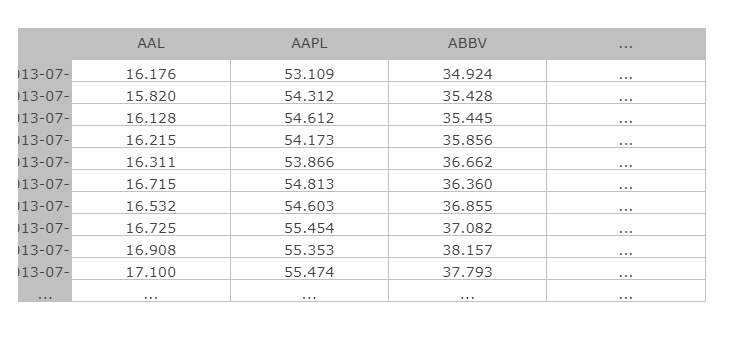

# Part 1: Smart Beta Portfolio
In Part 1 of this project, you'll **build a portfolio using dividend yield to choose the portfolio weights** A portfolio such as this could be incorporated into a smart beta ETF.  You'll **compare this portfolio to a market cap weighted index** to see how well it performs. 

Note that in practice, you'll probably get the index weights from a data vendor (such as companies that create indices, like MSCI, FTSE, Standard and Poor's), but for this exercise we will simulate a market cap weighted index.

## Index Weights
The index we'll be using is **based on large dollar volume stocks**. Implement `generate_dollar_volume_weights` to generate the weights for this index. For each date, generate the **weights based on dollar volume traded for that date**. For example, assume the following is close prices and volume data:
```
                 Prices
               A         B         ...
2013-07-08     2         2         ...
2013-07-09     5         6         ...
2013-07-10     1         2         ...
2013-07-11     6         5         ...
...            ...       ...       ...

                 Volume
               A         B         ...
2013-07-08     100       340       ...
2013-07-09     240       220       ...
2013-07-10     120       500       ...
2013-07-11     10        100       ...
...            ...       ...       ...
```
The weights created from the function `generate_dollar_volume_weights` should be the following:
```
               A         B         ...
2013-07-08     0.126..   0.194..   ...
2013-07-09     0.759..   0.377..   ...
2013-07-10     0.075..   0.285..   ...
2013-07-11     0.037..   0.142..   ...
...            ...       ...       ...
```

## Get the index weight by dollar volumn %
- individual stock dollar_volume of the day / total dollar_volume of ALL stock of the day

In [7]:
def generate_dollar_volume_weights(close, volume):
    assert close.index.equals(volume.index)
    assert close.columns.equals(volume.columns)
    
    dollar_volume = close * volume
    dollar_volume_weights = dollar_volume.divide(dollar_volume.sum(axis=1), axis=0)

    return dollar_volume_weights

In [10]:
dollar_volume=close * volume
dollar_volume.sum(axis=1)

date
2013-07-01    4.412360e+10
2013-07-02    4.677323e+10
2013-07-03    2.431898e+10
2013-07-05    3.263771e+10
2013-07-08    4.362199e+10
2013-07-09    4.792269e+10
2013-07-10    4.251049e+10
2013-07-11    5.061502e+10
2013-07-12    5.516423e+10
2013-07-15    4.362486e+10
2013-07-16    4.439026e+10
2013-07-17    4.555793e+10
2013-07-18    5.273090e+10
2013-07-19    6.184796e+10
2013-07-22    4.408066e+10
2013-07-23    4.486373e+10
2013-07-24    5.228928e+10
2013-07-25    6.035001e+10
2013-07-26    4.779877e+10
2013-07-29    4.096459e+10
2013-07-30    4.873677e+10
2013-07-31    6.034241e+10
2013-08-01    5.333374e+10
2013-08-02    4.546190e+10
2013-08-05    3.721807e+10
2013-08-06    4.410774e+10
2013-08-07    4.331425e+10
2013-08-08    4.241765e+10
2013-08-09    3.666033e+10
2013-08-12    3.690036e+10
                  ...     
2017-05-19    7.043395e+10
2017-05-22    5.685385e+10
2017-05-23    5.182021e+10
2017-05-24    5.318865e+10
2017-05-25    6.238977e+10
2017-05-26    4.958254e

In [11]:
dollar_volume.divide(dollar_volume.sum(axis=1), axis=0)

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.004587,0.117672,0.003632,0.004520,0.003908,0.011937,0.002779,0.009637,0.018465,0.005224,...,0.006304,0.007438,0.011757,0.005125,0.008851,0.005822,0.013168,0.009941,0.002753,0.022801
2013-07-02,0.003636,0.136400,0.003307,0.003873,0.002667,0.015243,0.002854,0.007326,0.019643,0.004271,...,0.007171,0.006602,0.008355,0.005331,0.008321,0.006326,0.011906,0.009433,0.003945,0.020180
2013-07-03,0.004669,0.135261,0.003524,0.010589,0.003485,0.012456,0.003154,0.007481,0.016036,0.004989,...,0.005252,0.006026,0.008407,0.009659,0.009957,0.007371,0.011884,0.006252,0.002716,0.017884
2013-07-05,0.003193,0.113709,0.003014,0.004477,0.002893,0.012361,0.003597,0.005949,0.017390,0.004097,...,0.007544,0.006996,0.011975,0.005525,0.010036,0.005636,0.016716,0.011014,0.002119,0.021147
2013-07-08,0.002678,0.092038,0.003344,0.005495,0.002507,0.009097,0.003243,0.004938,0.020296,0.004662,...,0.006705,0.005728,0.020366,0.004936,0.006821,0.006567,0.019465,0.010365,0.003704,0.021603
2013-07-09,0.003812,0.100820,0.002887,0.006693,0.002302,0.013244,0.007917,0.003810,0.016885,0.004360,...,0.005184,0.006156,0.021974,0.005925,0.005759,0.009531,0.017440,0.007442,0.003257,0.021302
2013-07-10,0.004473,0.090363,0.002670,0.006678,0.003295,0.010097,0.010588,0.008926,0.012448,0.005142,...,0.007188,0.006439,0.016438,0.006126,0.008002,0.017221,0.021840,0.008157,0.002598,0.022939
2013-07-11,0.002794,0.089372,0.002975,0.005676,0.002742,0.013350,0.004288,0.006480,0.023725,0.004725,...,0.006616,0.006555,0.012882,0.005561,0.008318,0.010042,0.023164,0.006303,0.005595,0.025207
2013-07-12,0.003243,0.070130,0.003938,0.003586,0.002725,0.010168,0.002871,0.006245,0.025307,0.004916,...,0.004316,0.007621,0.006488,0.009415,0.009329,0.005270,0.024023,0.005508,0.002877,0.016271


### View Data
Let's generate the index weights using `generate_dollar_volume_weights` and view them using a heatmap.

In [13]:
index_weights = generate_dollar_volume_weights(close, volume)
index_weights.head()
#project_helper.plot_weights(index_weights, 'Index Weights')

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.004587,0.117672,0.003632,0.004520,0.003908,0.011937,0.002779,0.009637,0.018465,0.005224,...,0.006304,0.007438,0.011757,0.005125,0.008851,0.005822,0.013168,0.009941,0.002753,0.022801
2013-07-02,0.003636,0.136400,0.003307,0.003873,0.002667,0.015243,0.002854,0.007326,0.019643,0.004271,...,0.007171,0.006602,0.008355,0.005331,0.008321,0.006326,0.011906,0.009433,0.003945,0.020180
2013-07-03,0.004669,0.135261,0.003524,0.010589,0.003485,0.012456,0.003154,0.007481,0.016036,0.004989,...,0.005252,0.006026,0.008407,0.009659,0.009957,0.007371,0.011884,0.006252,0.002716,0.017884
2013-07-05,0.003193,0.113709,0.003014,0.004477,0.002893,0.012361,0.003597,0.005949,0.017390,0.004097,...,0.007544,0.006996,0.011975,0.005525,0.010036,0.005636,0.016716,0.011014,0.002119,0.021147
2013-07-08,0.002678,0.092038,0.003344,0.005495,0.002507,0.009097,0.003243,0.004938,0.020296,0.004662,...,0.006705,0.005728,0.020366,0.004936,0.006821,0.006567,0.019465,0.010365,0.003704,0.021603


- if not error
- 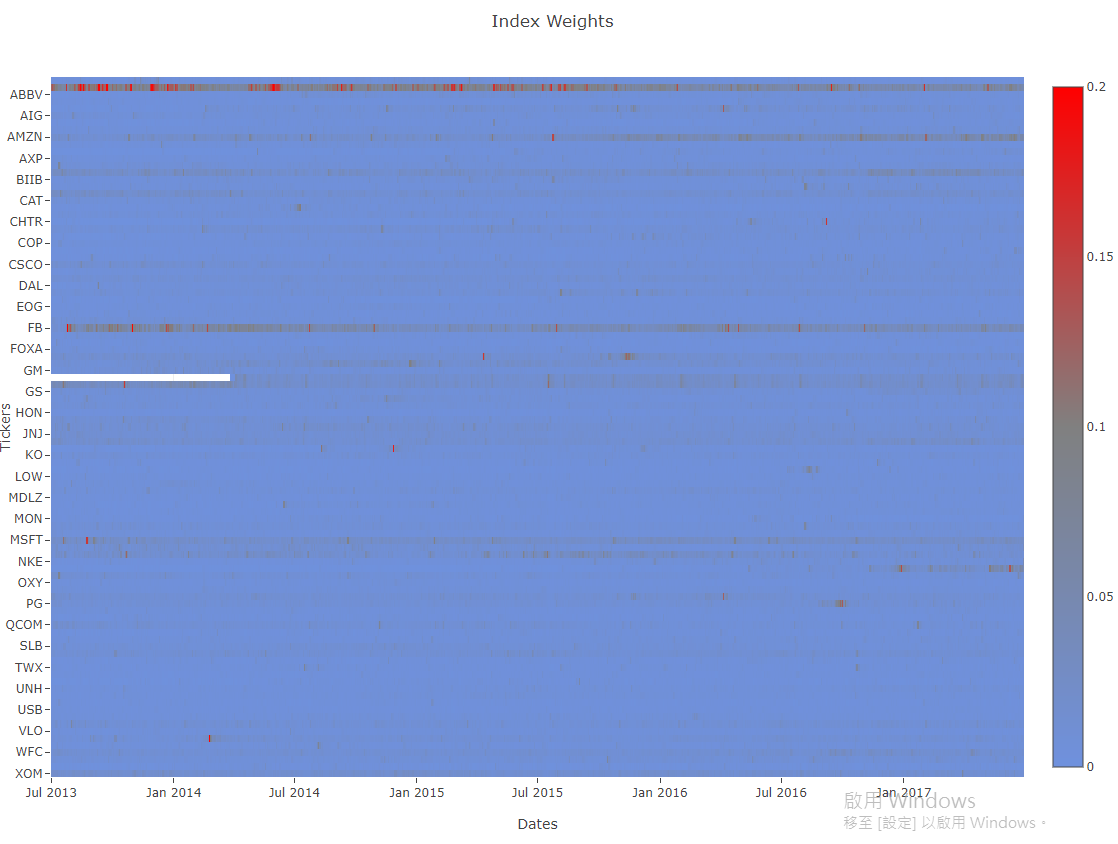

## Portfolio Weights
Now that we have the index weights, let's choose the **portfolio weights based on dividend**. You would normally calculate the weights based on trailing dividend yield, but we'll simplify this by just calculating the total dividend yield over time.

Implement `calculate_dividend_weights` to return the weights for each stock based on its total dividend yield over time. This is similar to generating the weight for the index, but it's using dividend data instead.
For example, assume the following is `dividends` data:
```
                 Prices
               A         B
2013-07-08     0         0
2013-07-09     0         1
2013-07-10     0.5       0
2013-07-11     0         0
2013-07-12     2         0
...            ...       ...
```
The weights created from the function `calculate_dividend_weights` should be the following:
```
               A         B
2013-07-08     NaN       NaN
2013-07-09     0         1
2013-07-10     0.333..   0.666..
2013-07-11     0.333..   0.666..
2013-07-12     0.714..   0.285..
...            ...       ...
```

## Get the portfolio weight base on dividend
- Use the total dividend yield over time, therefore have to cumsum to get the total dividend
- each cumulative dividend value / total cum dividend of ALL stock of that day

In [15]:
def calculate_dividend_weights(dividends):
    cum_dividend_yields = dividends.cumsum()
    dividend_weights = cum_dividend_yields.divide(cum_dividend_yields.sum(axis=1), axis=0)
    
    return dividend_weights

In [17]:
cum_dividend_yields = dividends.cumsum()
cum_dividend_yields


ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.0000,0.000,0.0,0.00,0.00,0.00
2013-07-02,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.0000,0.000,0.0,0.00,0.00,0.00
2013-07-03,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.0000,0.000,0.0,0.00,0.00,0.00
2013-07-05,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.0000,0.000,0.0,0.00,0.00,0.00
2013-07-08,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.5150,0.000,0.0,0.00,0.00,0.00
2013-07-09,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.5150,0.000,0.0,0.00,0.00,0.00
2013-07-10,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.5150,0.000,0.0,0.00,0.00,0.00
2013-07-11,0.0,0.00,0.40,0.14,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.5150,0.000,0.0,0.00,0.00,0.00
2013-07-12,0.0,0.00,0.40,0.14,0.0,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.5150,0.000,0.0,0.00,0.00,0.00


### View Data
Just like the index weights, let's generate the ETF weights and view them using a heatmap.

In [19]:
etf_weights = calculate_dividend_weights(dividends)
etf_weights.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.069997,0.0,0.0,0.0,0.0,0.0


- if not error
- 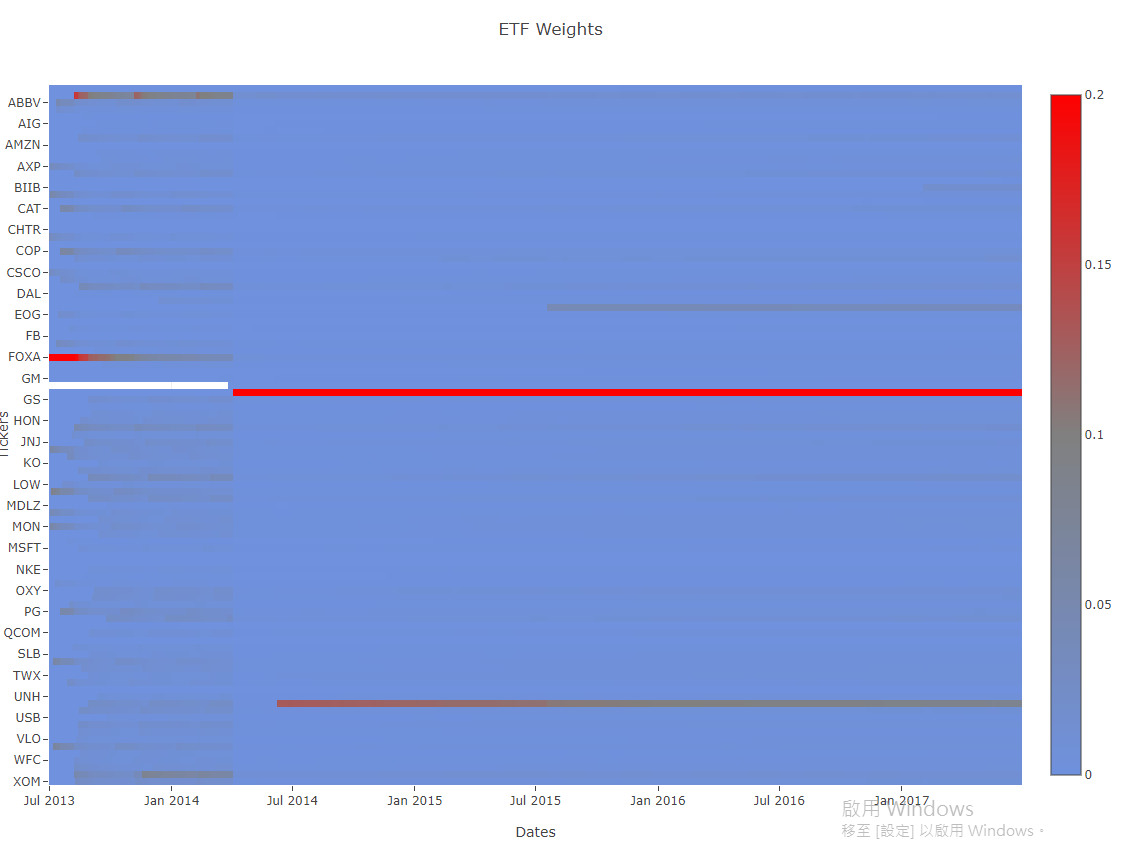

## Returns
Implement `generate_returns` to generate returns data for all the stocks and dates from price data. You might notice we're implementing returns and not log returns. Since **we're not dealing with volatility, we don't have to use log returns.**

In [20]:
def generate_returns(prices):
    return (prices - prices.shift(1)) / prices.shift(1)


### View Data
Let's generate the closing returns using `generate_returns` and view them using a heatmap.

In [21]:
returns = generate_returns(close)
returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,-0.022024,0.022653,0.014420,-0.004853,-0.012835,-0.004436,0.000337,-0.014668,0.005778,-0.000230,...,-0.000275,-0.009922,0.000108,-0.020730,0.005361,0.002706,-0.003385,0.001609,-0.017749,0.003765
2013-07-03,0.019477,0.005520,0.000474,-0.017499,0.001292,-0.014925,0.012146,-0.002603,0.001057,0.001844,...,0.001377,0.009915,0.009717,0.004472,0.007505,-0.007647,0.000000,0.000669,-0.000317,0.000552
2013-07-05,0.005373,-0.008032,0.011603,0.019562,0.019195,0.021936,0.014667,0.019100,0.006513,0.016680,...,0.011279,0.019001,0.020049,0.004749,0.005685,0.002947,0.020621,0.006019,0.007452,0.009703
2013-07-08,0.005938,-0.005678,0.022472,0.014032,0.000950,0.007303,-0.005256,0.005531,0.016475,-0.000905,...,0.007889,0.004662,-0.014099,0.020089,0.007505,0.024407,0.018065,0.019944,-0.000787,0.007426


- if not error
- 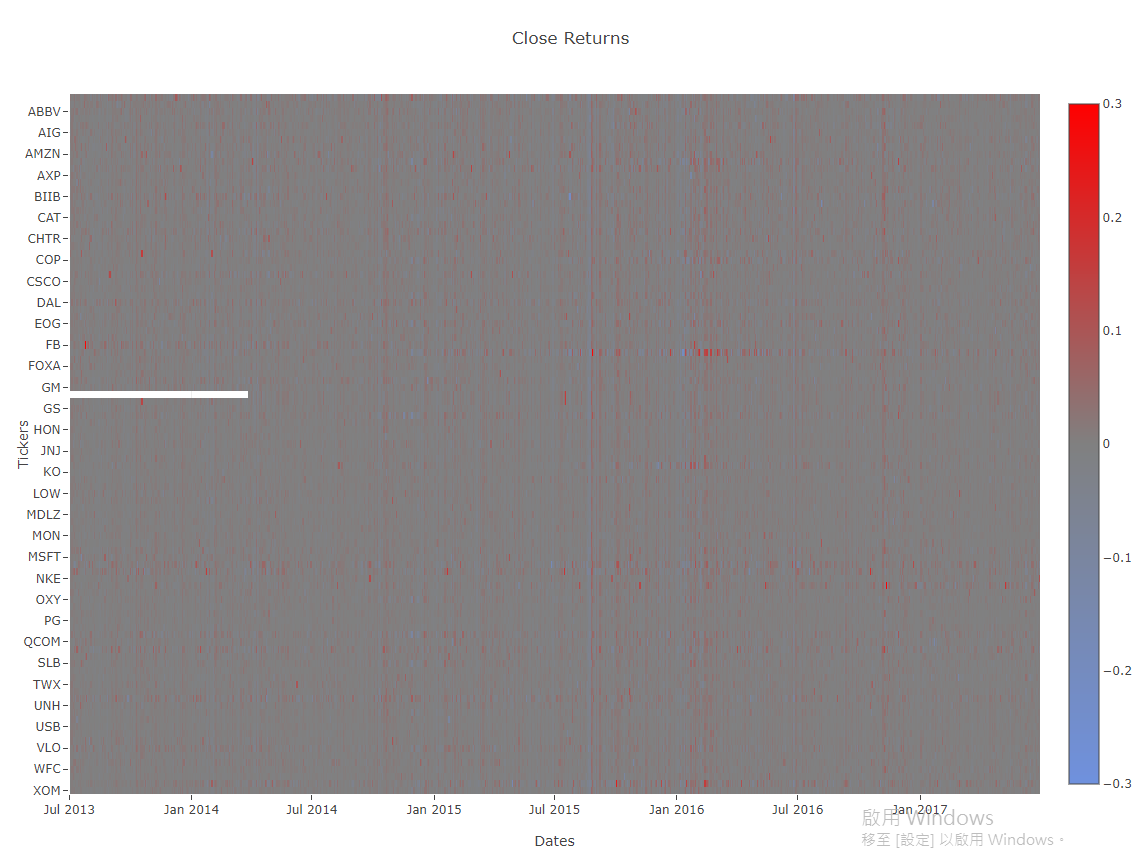

## Get the Weighted Returns
#### we use weighted return becoz return is fixed but weight is variable, we can adjust weight to archieve greatest return
- With the returns of each stock computed, we can use it to compute the returns for an index or ETF. Implement `generate_weighted_returns` to create weighted returns using the returns and weights.

In [22]:
def generate_weighted_returns(returns, weights):
    assert returns.index.equals(weights.index)
    assert returns.columns.equals(weights.columns)
    
    return returns * weights

### View Data
Let's generate the ETF and index returns using `generate_weighted_returns` and view them using a heatmap.

In [23]:
index_weighted_returns = generate_weighted_returns(returns, index_weights)
etf_weighted_returns = generate_weighted_returns(returns, etf_weights)
#project_helper.plot_returns(index_weighted_returns, 'Index Returns')
#project_helper.plot_returns(etf_weighted_returns, 'ETF Returns')

- 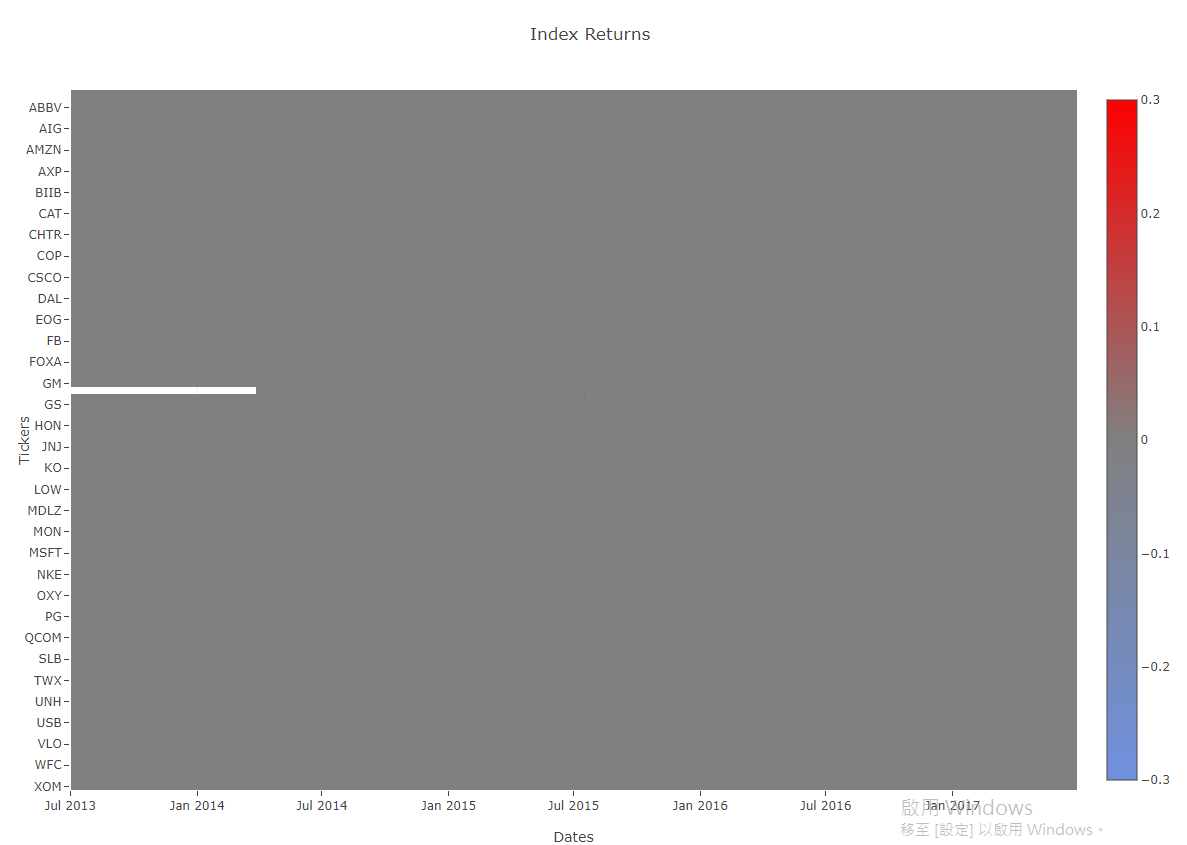

- 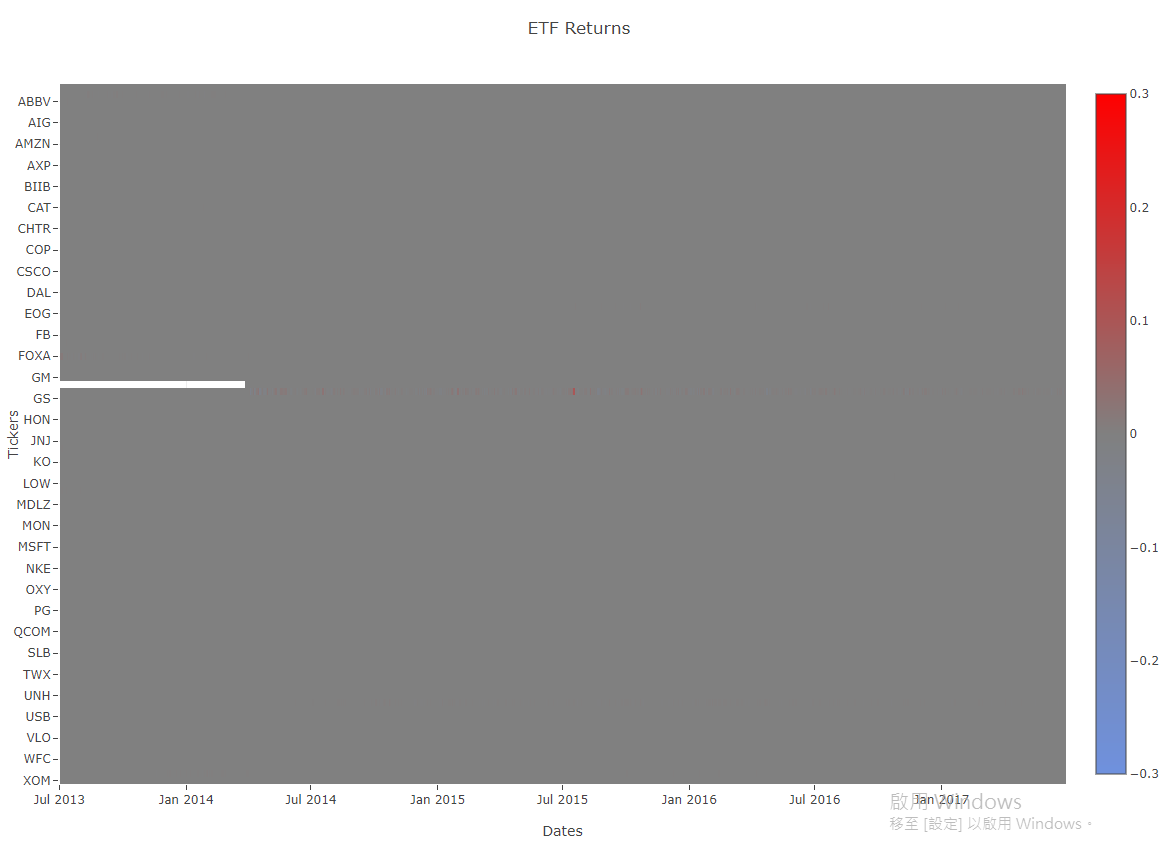

## Cumulative Returns
To compare performance between the ETF and Index, we're going to calculate the tracking error. Before we do that, we first need to **calculate the index and ETF comulative returns**. Implement `calculate_cumulative_returns` to calculate the cumulative returns over time given the returns.

In [24]:
def calculate_cumulative_returns(returns):    
    return (returns.sum(axis=1) + 1).cumprod()

In [25]:
index_weighted_returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,-0.000080,0.003090,0.000048,-0.000019,-0.000034,-0.000068,9.632765e-07,-0.000107,0.000114,-9.842016e-07,...,-0.000002,-0.000066,9.021515e-07,-0.000111,0.000045,0.000017,-0.000040,0.000015,-7.001658e-05,0.000076
2013-07-03,0.000091,0.000747,0.000002,-0.000185,0.000005,-0.000186,3.830613e-05,-0.000019,0.000017,9.198767e-06,...,0.000007,0.000060,8.168894e-05,0.000043,0.000075,-0.000056,0.000000,0.000004,-8.608899e-07,0.000010
2013-07-05,0.000017,-0.000913,0.000035,0.000088,0.000056,0.000271,5.276059e-05,0.000114,0.000113,6.833449e-05,...,0.000085,0.000133,2.400813e-04,0.000026,0.000057,0.000017,0.000345,0.000066,1.578963e-05,0.000205
2013-07-08,0.000016,-0.000523,0.000075,0.000077,0.000002,0.000066,-1.704396e-05,0.000027,0.000334,-4.219927e-06,...,0.000053,0.000027,-2.871453e-04,0.000099,0.000051,0.000160,0.000352,0.000207,-2.914900e-06,0.000160


In [26]:
index_weighted_returns.sum(axis=1).head()

date
2013-07-01    0.000000
2013-07-02    0.002729
2013-07-03    0.002045
2013-07-05    0.009351
2013-07-08    0.004429
dtype: float64

In [27]:
(returns.sum(axis=1) + 1).cumprod().head()


date
2013-07-01    1.000000
2013-07-02    0.999404
2013-07-03    1.139523
2013-07-05    2.392457
2013-07-08    3.387835
dtype: float64

### View Data
Let's generate the ETF and index cumulative returns using `calculate_cumulative_returns` and compare the two.

In [28]:
index_weighted_cumulative_returns = calculate_cumulative_returns(index_weighted_returns)
etf_weighted_cumulative_returns = calculate_cumulative_returns(etf_weighted_returns)
project_helper.plot_benchmark_returns(index_weighted_cumulative_returns, etf_weighted_cumulative_returns, 'Smart Beta ETF vs Index')

In [29]:
index_weighted_cumulative_returns.head()

date
2013-07-01    1.000000
2013-07-02    1.002729
2013-07-03    1.004780
2013-07-05    1.014176
2013-07-08    1.018668
dtype: float64

In [30]:
etf_weighted_cumulative_returns.head()

date
2013-07-01    1.000000
2013-07-02    0.996859
2013-07-03    1.005813
2013-07-05    1.027155
2013-07-08    1.028802
dtype: float64

## Annualized Tracking Error
In order to check the performance of the smart beta portfolio, we can calculate the **annualized tracking error against the index**. Implement `tracking_error` to return the tracking error between the ETF and benchmark.

For reference, we'll be using the following annualized tracking error function:
$$ TE = \sqrt{252} * SampleStdev(r_p - r_b) $$

Where $ r_p $ is the portfolio/ETF returns and $ r_b $ is the benchmark returns.

_Note: When calculating the sample standard deviation, the delta degrees of freedom is 1, which is the also the default value._

In [31]:
def tracking_error(benchmark_returns_by_date, etf_returns_by_date):
    assert benchmark_returns_by_date.index.equals(etf_returns_by_date.index)
    

    return np.sqrt(252) * np.std(etf_returns_by_date - benchmark_returns_by_date, ddof=1)

### View Data
Let's generate the tracking error using `tracking_error`.

In [32]:
daily_index_weighted_returns=np.sum(index_weighted_returns, 1)
daily_etf_weighted_returns=np.sum(etf_weighted_returns, 1)
 

smart_beta_tracking_error = tracking_error(daily_index_weighted_returns, daily_etf_weighted_returns)
print('Current Annualized Smart Beta Tracking Error: {}'.format(smart_beta_tracking_error))

Current Annualized Smart Beta Tracking Error: 0.10202570304150262


# Part 2: Portfolio Optimization

Now, let's create another portfolio with portfolio optimization.  We'll still reuse the market cap weighted index, but no longer than the original dividend-weighted portfolio we created in part 1.

We want to both minimize the portfolio variance and also want to closely track a market cap weighted index.  In other words, we're trying to **minimize the distance between the weights of our portfolio and the weights of the index.**

$Minimize \left [ \sigma^2_p + \lambda \sqrt{\sum_{1}^{m}(weight_i - indexWeight_i)^2} \right  ]$ where $m$ is the number of stocks in the portfolio, and $\lambda$ is a scaling factor that you can choose.

Why are we doing this? **One way that investors evaluate a fund is by how well it tracks its index.** The fund is still expected to deviate from the index within a certain range in order to **improve fund performance**.  A way for a fund to track the performance of its benchmark is by keeping its asset weights similar to the weights of the index.  We’d expect that if the fund has the same stocks as the benchmark, and also the same weights for each stock as the benchmark, the fund would yield about the same returns as the benchmark. By minimizing a linear combination of both the portfolio risk and distance between portfolio and benchmark weights, we attempt to balance the desire to minimize portfolio variance with the goal of tracking the index.


## Covariance
Implement `get_covariance_returns` to calculate the covariance of the `returns`. We'll use this to calculate the portfolio variance.

If we have $m$ stock series, the covariance matrix is an $m \times m$ matrix containing the covariance between each pair of stocks.  We can use [`Numpy.cov`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) to get the covariance.  We give it a 2D array in which each row is a stock series, and each column is an observation at the same period of time. For any `NaN` values, you can replace them with zeros using the [`DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) function.

The covariance matrix $\mathbf{P} = 
\begin{bmatrix}
\sigma^2_{1,1} & ... & \sigma^2_{1,m} \\ 
... & ... & ...\\
\sigma_{m,1} & ... & \sigma^2_{m,m}  \\
\end{bmatrix}$

## Transpose to get the correct data form for cvx convariance matrix


In [35]:
def get_covariance_returns(returns):    
    return np.cov(returns.T.fillna(0))

In [36]:
returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,-0.022024,0.022653,0.014420,-0.004853,-0.012835,-0.004436,0.000337,-0.014668,0.005778,-0.000230,...,-0.000275,-0.009922,0.000108,-0.020730,0.005361,0.002706,-0.003385,0.001609,-0.017749,0.003765
2013-07-03,0.019477,0.005520,0.000474,-0.017499,0.001292,-0.014925,0.012146,-0.002603,0.001057,0.001844,...,0.001377,0.009915,0.009717,0.004472,0.007505,-0.007647,0.000000,0.000669,-0.000317,0.000552
2013-07-05,0.005373,-0.008032,0.011603,0.019562,0.019195,0.021936,0.014667,0.019100,0.006513,0.016680,...,0.011279,0.019001,0.020049,0.004749,0.005685,0.002947,0.020621,0.006019,0.007452,0.009703
2013-07-08,0.005938,-0.005678,0.022472,0.014032,0.000950,0.007303,-0.005256,0.005531,0.016475,-0.000905,...,0.007889,0.004662,-0.014099,0.020089,0.007505,0.024407,0.018065,0.019944,-0.000787,0.007426


### View Data
Let's look at the covariance generated from `get_covariance_returns`.

In [39]:
covariance_returns = get_covariance_returns(returns)
covariance_returns

array([[5.31791451e-04, 7.21251856e-05, 9.55847963e-05, ...,
        4.55526842e-05, 1.26756746e-04, 4.27885833e-05],
       [7.21251856e-05, 2.14185487e-04, 4.87000321e-05, ...,
        3.43023358e-05, 8.17766960e-05, 4.13786801e-05],
       [9.55847963e-05, 4.87000321e-05, 2.64537496e-04, ...,
        3.32734532e-05, 1.11616723e-04, 5.40669112e-05],
       ...,
       [4.55526842e-05, 3.43023358e-05, 3.32734532e-05, ...,
        1.14424083e-04, 3.48568802e-05, 2.79122492e-05],
       [1.26756746e-04, 8.17766960e-05, 1.11616723e-04, ...,
        3.48568802e-05, 7.17162013e-04, 8.42633668e-05],
       [4.27885833e-05, 4.13786801e-05, 5.40669112e-05, ...,
        2.79122492e-05, 8.42633668e-05, 1.29561995e-04]])

In [40]:
covariance_returns.shape

(99, 99)

In [41]:
covariance_returns = pd.DataFrame(covariance_returns, returns.columns, returns.columns)
covariance_returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,0.000532,0.000072,0.000096,0.000090,0.000115,0.000095,0.000135,0.000118,0.000092,0.000084,...,0.000097,0.000084,0.000105,0.000113,0.000042,0.000101,0.000099,0.000046,0.000127,0.000043
AAPL,0.000072,0.000214,0.000049,0.000056,0.000058,0.000059,0.000089,0.000069,0.000081,0.000077,...,0.000058,0.000047,0.000061,0.000065,0.000033,0.000059,0.000053,0.000034,0.000082,0.000041
ABBV,0.000096,0.000049,0.000265,0.000091,0.000133,0.000072,0.000081,0.000135,0.000079,0.000072,...,0.000064,0.000052,0.000065,0.000082,0.000038,0.000079,0.000069,0.000033,0.000112,0.000054
ABT,0.000090,0.000056,0.000091,0.000155,0.000088,0.000072,0.000078,0.000101,0.000063,0.000073,...,0.000072,0.000060,0.000080,0.000079,0.000044,0.000074,0.000073,0.000043,0.000086,0.000052
AGN,0.000115,0.000058,0.000133,0.000088,0.000325,0.000078,0.000090,0.000140,0.000089,0.000072,...,0.000065,0.000055,0.000081,0.000098,0.000034,0.000096,0.000071,0.000028,0.000115,0.000045


## get correlation from covariance
- np.linalg.inv(np.diag(np.sqrt(np.diag(covariance))))

In [42]:
covariance_returns_correlation = np.linalg.inv(np.diag(np.sqrt(np.diag(covariance_returns))))
covariance_returns_correlation

array([[43.36399884,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 68.32898664,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 61.4831883 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 93.48485969,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        37.34146576,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 87.85392865]])

In [43]:
np.diag(covariance_returns)


array([5.31791451e-04, 2.14185487e-04, 2.64537496e-04, 1.54568179e-04,
       3.25399597e-04, 1.57904782e-04, 2.88586336e-04, 2.51600550e-04,
       3.49811950e-04, 5.35539069e-04, 4.29501174e-04, 1.63605347e-04,
       1.74781269e-04, 2.58853387e-04, 4.99977596e-04, 2.52054380e-04,
       2.34932059e-04, 2.16824950e-04, 2.14743039e-04, 3.58660831e-04,
       2.71814632e-04, 1.35154192e-04, 3.53548651e-04, 3.66015802e-04,
       1.07721709e-04, 3.87092618e-04, 1.67709773e-04, 1.35708308e-04,
       1.79902816e-04, 3.94648351e-04, 1.31991338e-04, 2.66465033e-04,
       3.72804089e-04, 1.81636434e-04, 2.02359842e-04, 4.36326200e-04,
       1.31236981e-03, 1.76138851e-04, 2.04383301e-04, 1.23819969e-04,
       3.16456580e-04, 2.30942066e-04, 1.71133307e-04, 2.07338056e-04,
       1.89673635e-04, 3.79307923e-04, 1.20462995e-04, 1.13058536e-04,
       1.36492251e-04, 1.85682430e-04, 7.87584622e-05, 1.72756414e-04,
       4.14461675e-04, 7.39085549e-05, 1.84846725e-04, 1.05918319e-04,
      

In [44]:
covariance_returns_correlation = pd.DataFrame(
    covariance_returns_correlation.dot(covariance_returns).dot(covariance_returns_correlation),
    covariance_returns.index,
    covariance_returns.columns)
covariance_returns_correlation.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,1.000000,0.213708,0.254844,0.312691,0.276696,0.326725,0.344918,0.322227,0.212470,0.157773,...,0.386823,0.352164,0.346633,0.263003,0.185649,0.286837,0.358606,0.184665,0.205254,0.163012
AAPL,0.213708,1.000000,0.204593,0.306641,0.219841,0.322727,0.359493,0.296799,0.294207,0.225890,...,0.360110,0.307629,0.318795,0.235848,0.232461,0.263712,0.299182,0.219114,0.208654,0.248395
ABBV,0.254844,0.204593,1.000000,0.449197,0.454011,0.353971,0.292382,0.524182,0.261327,0.192283,...,0.362642,0.311172,0.307102,0.269244,0.239339,0.318339,0.351416,0.191247,0.256258,0.292045
ABT,0.312691,0.306641,0.449197,1.000000,0.390637,0.458330,0.367100,0.511899,0.270373,0.255049,...,0.529601,0.466143,0.488132,0.341392,0.362349,0.392735,0.487646,0.325910,0.259440,0.365231
AGN,0.276696,0.219841,0.454011,0.390637,1.000000,0.343465,0.294242,0.488958,0.263433,0.171957,...,0.329825,0.292373,0.342419,0.290303,0.195880,0.350150,0.329306,0.142767,0.238234,0.217889


In [45]:
#project_helper.plot_covariance_returns_correlation_df(
#    covariance_returns_correlation_df,
#    'Covariance Returns Correlation Matrix')

- 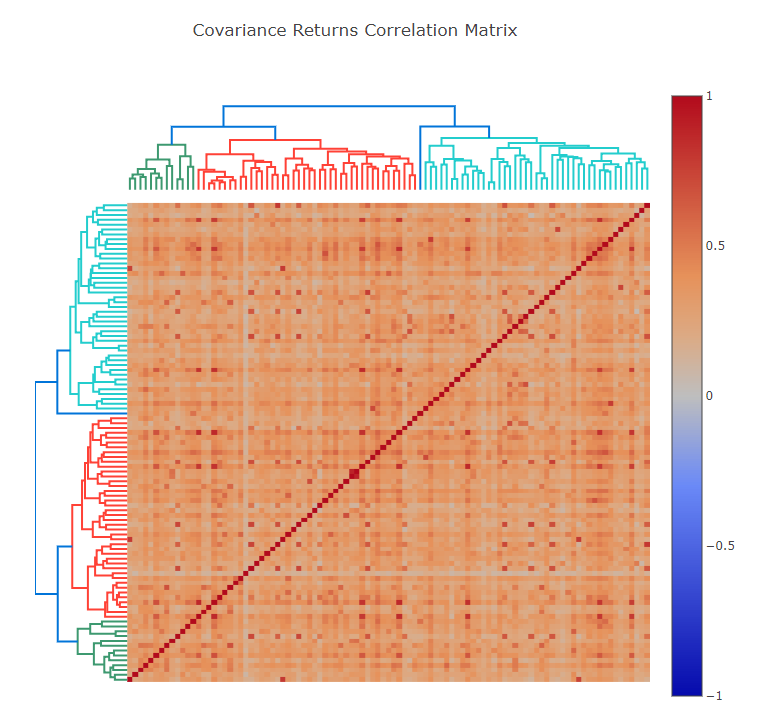

## portfolio variance
We can write the portfolio variance $\sigma^2_p = \mathbf{x^T} \mathbf{P} \mathbf{x}$

Recall that the $\mathbf{x^T} \mathbf{P} \mathbf{x}$ is called the quadratic form.
We can use the cvxpy function `quad_form(x,P)` to get the quadratic form.

### Distance from index weights
We want portfolio weights that track the index closely.  So we want to minimize the distance between them.
Recall from the Pythagorean theorem that you can get the distance between two points in an x,y plane by adding the square of the x and y distances and taking the square root.  Extending this to any number of dimensions is called the L2 norm.  So: $\sqrt{\sum_{1}^{n}(weight_i - indexWeight_i)^2}$  Can also be written as $\left \| \mathbf{x} - \mathbf{index} \right \|_2$.  There's a cvxpy function called [norm()](https://www.cvxpy.org/api_reference/cvxpy.atoms.other_atoms.html#norm)
`norm(x, p=2, axis=None)`.  The default is already set to find an L2 norm, so you would pass in one argument, which is the difference between your portfolio weights and the index weights.

### objective function
We want to minimize both the portfolio variance and the distance of the portfolio weights from the index weights.
We also want to choose a `scale` constant, which is $\lambda$ in the expression. 

$\mathbf{x^T} \mathbf{P} \mathbf{x} + \lambda \left \| \mathbf{x} - \mathbf{index} \right \|_2$


This lets us choose how much priority we give to minimizing the difference from the index, relative to minimizing the variance of the portfolio.  If you choose a higher value for `scale` ($\lambda$).

We can find the objective function using cvxpy `objective = cvx.Minimize()`.  Can you guess what to pass into this function?



In [46]:
import cvxpy as cvx

def get_optimal_weights(covariance_returns, index_weights, scale=2.0):
    assert len(covariance_returns.shape) == 2
    assert len(index_weights.shape) == 1
    assert covariance_returns.shape[0] == covariance_returns.shape[1]  == index_weights.shape[0]
    

    num_of_weights = len(index_weights)
    
    x = cvx.Variable(num_of_weights)
    
    portfolio_variance = cvx.quad_form(x, covariance_returns)
    
    distance_to_index = cvx.norm(x - index_weights, p=2)
    
    objective = cvx.Minimize(portfolio_variance + scale * distance_to_index)
    
    constraints = [x >= 0, sum(x) == 1]

    cvx.Problem(objective, constraints).solve()
    
    x_values = x.value
    
    return x_values


In [47]:
covariance_returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,0.000532,0.000072,0.000096,0.000090,0.000115,0.000095,0.000135,0.000118,0.000092,0.000084,...,0.000097,0.000084,0.000105,0.000113,0.000042,0.000101,0.000099,0.000046,0.000127,0.000043
AAPL,0.000072,0.000214,0.000049,0.000056,0.000058,0.000059,0.000089,0.000069,0.000081,0.000077,...,0.000058,0.000047,0.000061,0.000065,0.000033,0.000059,0.000053,0.000034,0.000082,0.000041
ABBV,0.000096,0.000049,0.000265,0.000091,0.000133,0.000072,0.000081,0.000135,0.000079,0.000072,...,0.000064,0.000052,0.000065,0.000082,0.000038,0.000079,0.000069,0.000033,0.000112,0.000054
ABT,0.000090,0.000056,0.000091,0.000155,0.000088,0.000072,0.000078,0.000101,0.000063,0.000073,...,0.000072,0.000060,0.000080,0.000079,0.000044,0.000074,0.000073,0.000043,0.000086,0.000052
AGN,0.000115,0.000058,0.000133,0.000088,0.000325,0.000078,0.000090,0.000140,0.000089,0.000072,...,0.000065,0.000055,0.000081,0.000098,0.000034,0.000096,0.000071,0.000028,0.000115,0.000045


In [48]:
index_weights.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.004587,0.117672,0.003632,0.004520,0.003908,0.011937,0.002779,0.009637,0.018465,0.005224,...,0.006304,0.007438,0.011757,0.005125,0.008851,0.005822,0.013168,0.009941,0.002753,0.022801
2013-07-02,0.003636,0.136400,0.003307,0.003873,0.002667,0.015243,0.002854,0.007326,0.019643,0.004271,...,0.007171,0.006602,0.008355,0.005331,0.008321,0.006326,0.011906,0.009433,0.003945,0.020180
2013-07-03,0.004669,0.135261,0.003524,0.010589,0.003485,0.012456,0.003154,0.007481,0.016036,0.004989,...,0.005252,0.006026,0.008407,0.009659,0.009957,0.007371,0.011884,0.006252,0.002716,0.017884
2013-07-05,0.003193,0.113709,0.003014,0.004477,0.002893,0.012361,0.003597,0.005949,0.017390,0.004097,...,0.007544,0.006996,0.011975,0.005525,0.010036,0.005636,0.016716,0.011014,0.002119,0.021147
2013-07-08,0.002678,0.092038,0.003344,0.005495,0.002507,0.009097,0.003243,0.004938,0.020296,0.004662,...,0.006705,0.005728,0.020366,0.004936,0.006821,0.006567,0.019465,0.010365,0.003704,0.021603


In [49]:
index_weights.shape

(1009, 99)

## Optimized Portfolio
Using the `get_optimal_weights` function, let's generate the optimal ETF weights without rebalanceing. We can do this by feeding in the covariance of the entire history of data. We also need to feed in a set of index weights. We'll go with the average weights of the index over time.

In [50]:
raw_optimal_single_rebalance_etf_weights = get_optimal_weights(covariance_returns.values, index_weights.iloc[-1])


raw_optimal_single_rebalance_etf_weights

array([0.00505383, 0.04996914, 0.00507628, 0.00344529, 0.00631443,
       0.00723481, 0.00628914, 0.00690689, 0.05022972, 0.00367206,
       0.00923578, 0.00420389, 0.00659224, 0.03065369, 0.0057022 ,
       0.00386121, 0.0159118 , 0.00755899, 0.00230404, 0.00784448,
       0.00719021, 0.01067014, 0.00471339, 0.00600604, 0.01150549,
       0.00522686, 0.01085341, 0.00530558, 0.00845056, 0.00402521,
       0.0081877 , 0.00579648, 0.00573072, 0.00533293, 0.00660151,
       0.04082251, 0.00271105, 0.004656  , 0.00335664, 0.01048722,
       0.00708355, 0.00395319, 0.02907164, 0.03255119, 0.0105735 ,
       0.00460467, 0.00836054, 0.00353609, 0.00806711, 0.01229801,
       0.01038399, 0.02300489, 0.00370103, 0.00620664, 0.00700668,
       0.00450263, 0.00544879, 0.00660128, 0.00573769, 0.0037471 ,
       0.00505419, 0.00563285, 0.01461977, 0.00793407, 0.00560465,
       0.0250028 , 0.03350294, 0.01192162, 0.04150111, 0.040325  ,
       0.00993157, 0.00412432, 0.00568072, 0.00669019, 0.00783

In [51]:
raw_optimal_single_rebalance_etf_weights.shape


(99,)

In [52]:
optimal_single_rebalance_etf_weights = pd.DataFrame(
    np.tile(raw_optimal_single_rebalance_etf_weights, (len(returns.index), 1)),
    returns.index,
    returns.columns)
optimal_single_rebalance_etf_weights

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-02,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-03,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-05,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-08,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-09,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-10,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-11,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631
2013-07-12,0.005054,0.049969,0.005076,0.003445,0.006314,0.007235,0.006289,0.006907,0.05023,0.003672,...,0.005319,0.004403,0.012884,0.002964,0.0087,0.008318,0.013819,0.007876,0.002945,0.016631


With our ETF weights built, let's compare it to the index. Run the next cell to calculate the ETF returns and compare it to the index returns.

## Get the weight return

In [53]:
optim_etf_returns = generate_weighted_returns(returns, optimal_single_rebalance_etf_weights)


## get the cumulative return for comparison with index weight return

In [54]:
optim_etf_cumulative_returns = calculate_cumulative_returns(optim_etf_returns)

project_helper.plot_benchmark_returns(index_weighted_cumulative_returns, optim_etf_cumulative_returns, 'Optimized ETF vs Index')

optim_etf_tracking_error = tracking_error(np.sum(index_weighted_returns, 1), np.sum(optim_etf_returns, 1))
print('Optimized ETF Tracking Error: {}'.format(optim_etf_tracking_error))

Optimized ETF Tracking Error: 0.05792147628278622


#### the tracking error is less than the dividend weight

## Rebalance Portfolio Over Time
The single optimized ETF portfolio used the **same weights for the entire history**. This might not be the optimal weights for the **entire period**. Let's rebalance the portfolio over the same period instead of using the same weights. Implement `rebalance_portfolio` to rebalance a portfolio.

Reblance the portfolio every n number of days, which is given as `shift_size`. When rebalancing, you should look back a certain number of days of data in the past, denoted as `chunk_size`. Using this data, compute the optoimal weights using `get_optimal_weights` and `get_covariance_returns`.

In [55]:
def rebalance_portfolio(returns, index_weights, shift_size, chunk_size):
    assert returns.index.equals(index_weights.index)
    assert returns.columns.equals(index_weights.columns)
    assert shift_size > 0
    assert chunk_size >= 0    
    all_rebalance_weights = []

    for i in range(chunk_size, len(returns), shift_size):

        
        chunk = returns.iloc[i - chunk_size : i]
 
        
        covariance_returns = get_covariance_returns(chunk)
        
        optimal_weights = get_optimal_weights(covariance_returns, index_weights.iloc[i - 1])
        
        all_rebalance_weights.append(optimal_weights)
        
    return all_rebalance_weights


Run the following cell to rebalance the portfolio using `rebalance_portfolio`.

In [56]:
chunk_size = 250
shift_size = 5
all_rebalance_weights = rebalance_portfolio(returns, index_weights, shift_size, chunk_size)


In [57]:
all_rebalance_weights


[array([0.01043134, 0.06006002, 0.01145332, 0.00460319, 0.00899074,
        0.00659741, 0.00588434, 0.00543873, 0.01913355, 0.00440472,
        0.00117287, 0.00498903, 0.00982399, 0.02170975, 0.00656725,
        0.00762632, 0.01871608, 0.00315683, 0.01490108, 0.00299942,
        0.00180181, 0.01017089, 0.00302964, 0.00757446, 0.00280221,
        0.00379319, 0.00894089, 0.00609675, 0.01479801, 0.00855455,
        0.01117655, 0.00342065, 0.00574597, 0.0052358 , 0.0066932 ,
        0.06960769, 0.00447415, 0.00371878, 0.00759784, 0.01160758,
        0.01144284, 0.00780362, 0.0217761 , 0.02548132, 0.00738601,
        0.01097032, 0.0083364 , 0.00317682, 0.0111048 , 0.01594194,
        0.01052272, 0.01329633, 0.00202779, 0.01358219, 0.00451156,
        0.00311991, 0.0050552 , 0.00628738, 0.00545589, 0.00816001,
        0.01323018, 0.00557249, 0.01257088, 0.00812513, 0.00680572,
        0.01944452, 0.01416098, 0.0194583 , 0.00839333, 0.00246675,
        0.0137056 , 0.00461931, 0.00608005, 0.01

## Portfolio Turnover
With the portfolio rebalanced, we need to use a metric to **measure the cost of rebalancing the portfolio**. Implement `get_portfolio_turnover` to calculate the annual portfolio turnover. We'll be using the formulas used in the classroom:

$ AnnualizedTurnover =\frac{SumTotalTurnover}{NumberOfRebalanceEvents} * NumberofRebalanceEventsPerYear $

$ SumTotalTurnover =\sum_{t,n}{\left | x_{t,n} - x_{t+1,n} \right |} $ Where $ x_{t,n} $ are the weights at time $ t $ for equity $ n $.

$ SumTotalTurnover $ is just a different way of writing $ \sum \left | x_{t_1,n} - x_{t_2,n} \right | $

In [58]:
def get_portfolio_turnover(all_rebalance_weights, shift_size, rebalance_count, n_trading_days_in_year=252):

    assert shift_size > 0
    assert rebalance_count > 0
    
    all_rebalance_weights = np.asarray(all_rebalance_weights)


    sum_total_turnover = np.abs(np.diff(all_rebalance_weights, axis=0)).sum()
    number_rebalance_events_per_year = n_trading_days_in_year // shift_size
    annualized_turnover = (sum_total_turnover / rebalance_count) * number_rebalance_events_per_year
    
    return annualized_turnover

In [59]:
print(get_portfolio_turnover(all_rebalance_weights, shift_size, len(all_rebalance_weights) - 1))

16.594080020340048


In [60]:
all_rebalance_weights = np.asarray(all_rebalance_weights)

In [61]:
A=(np.diff(all_rebalance_weights, axis=0))
A
#have shape (151, 99)

array([[ 0.00021606,  0.00438047, -0.00522031, ..., -0.00385097,
        -0.00302292,  0.00360026],
       [-0.00295408,  0.00459267,  0.00874417, ...,  0.00089688,
        -0.00139041, -0.00430142],
       [-0.00152719,  0.00485947,  0.01936764, ..., -0.00146573,
         0.00033232, -0.00322477],
       ...,
       [-0.00075506,  0.03169858, -0.00181036, ..., -0.00651127,
        -0.00097315, -0.00190424],
       [-0.00105646, -0.03004395,  0.00269396, ...,  0.01011916,
         0.00136547, -0.00155322],
       [ 0.00022924, -0.0081832 , -0.00186884, ..., -0.00719197,
        -0.00106736, -0.00232056]])

In [62]:
np.abs(np.diff(all_rebalance_weights, axis=0)).sum()



50.11412166142695

In [63]:
np.sum(np.abs(A), axis=0)


array([0.35630008, 3.19765761, 0.42675103, 0.22223365, 0.91000589,
       0.37971757, 0.32287451, 0.34598373, 2.14349481, 0.30679224,
       0.43546057, 0.35657711, 0.43100736, 1.05031869, 0.58793259,
       0.31967901, 0.61593266, 0.37115761, 0.32983221, 0.42209668,
       0.49057021, 0.64231389, 0.57167113, 0.35096052, 0.28098626,
       0.41610053, 0.56767269, 0.35946079, 0.37818915, 0.34056048,
       0.77465343, 0.31293281, 0.29859992, 0.24489005, 0.33118997,
       2.01301798, 0.36435939, 0.26291825, 0.39991796, 0.81328925,
       0.83515292, 0.41433549, 0.88586056, 0.99595687, 0.38330044,
       0.4995897 , 0.38286425, 0.23034876, 0.54220168, 0.53191184,
       0.38371778, 0.69643048, 0.33882445, 0.35970023, 0.27727457,
       0.37430665, 0.27711067, 0.24191121, 0.47943129, 0.25866248,
       0.30269395, 0.22143635, 0.35397567, 0.39076041, 0.26328561,
       0.98223363, 0.41650927, 1.69857272, 0.43961903, 0.54459685,
       0.45828033, 0.24581457, 0.24557967, 0.58509738, 0.61384

In [64]:
np.sum(np.abs(A))

50.11412166142695